In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Colab Notebooks/'

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Crop_recommendation.csv')

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.shape

(2200, 8)

In [ ]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
print("Number of labels: {}".format(df['label'].nunique()))
df['label'].value_counts()

Number of labels: 22


rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [ ]:
#check null values
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

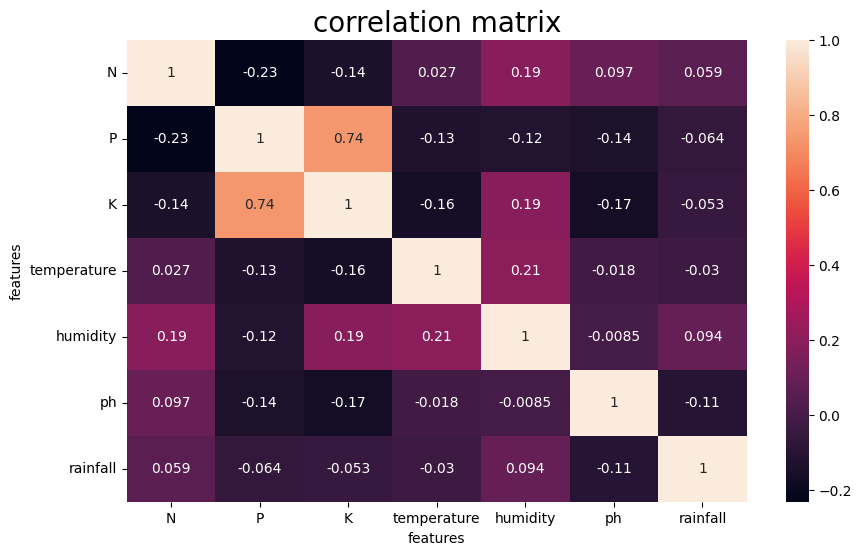

In [ ]:
#Correlation matrix
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.xlabel('features')
plt.ylabel('features')
plt.title('correlation matrix',fontsize=20);


In [ ]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']

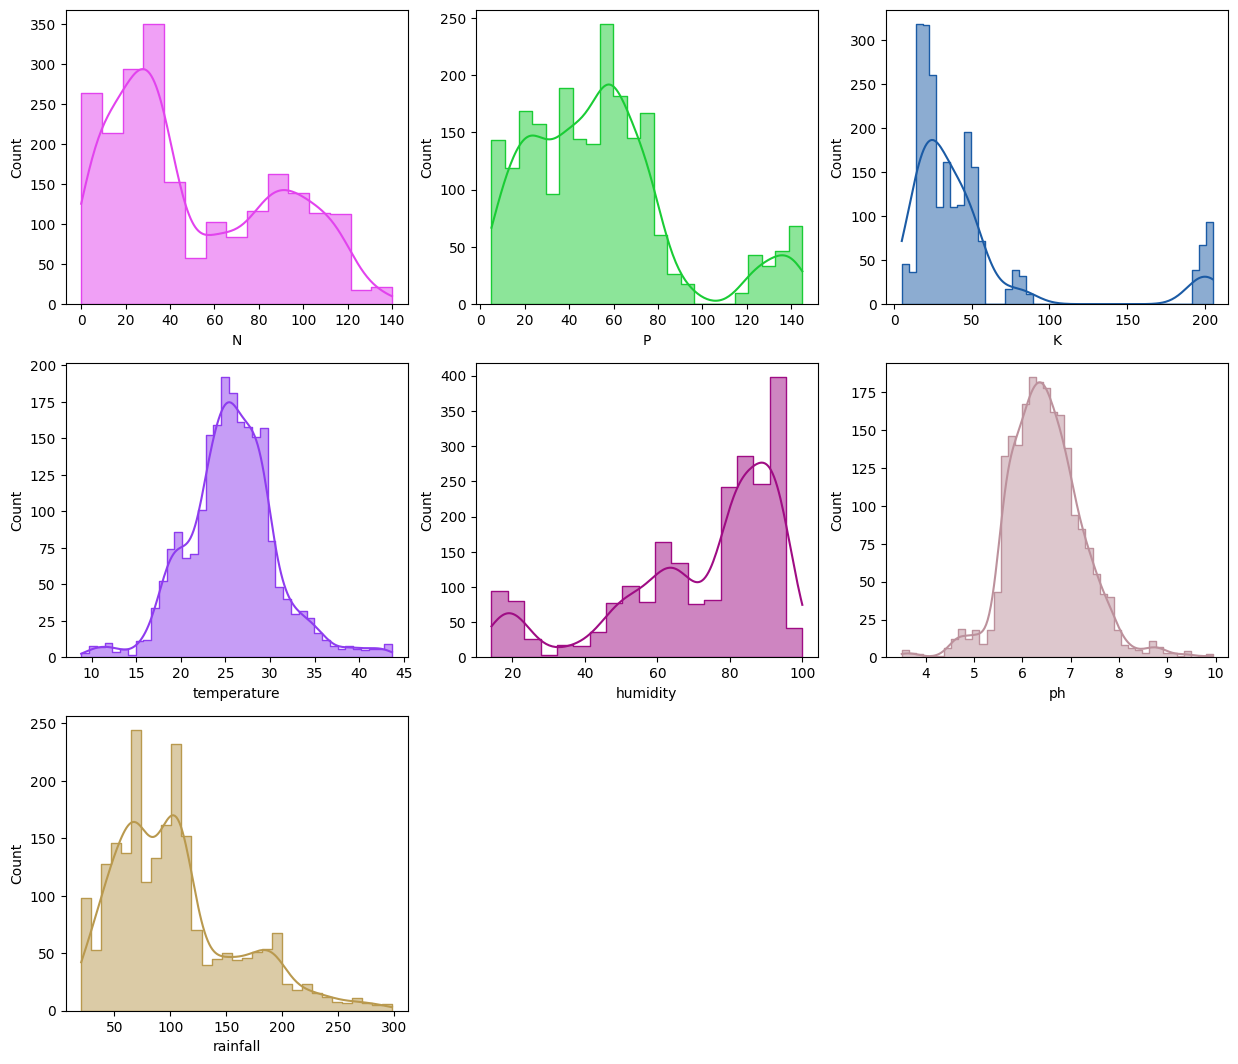

In [ ]:
# Distribution
plt.figure(figsize=(15,13))
i=1                                                   # kde use for denoting edges of histogram
for column in features:
  plt.subplot(3,3,i)
  colors = np.random.rand(3,)
  sns.histplot(df[column],kde=True,color=colors,element='step')
  i=i+1
plt.show()  

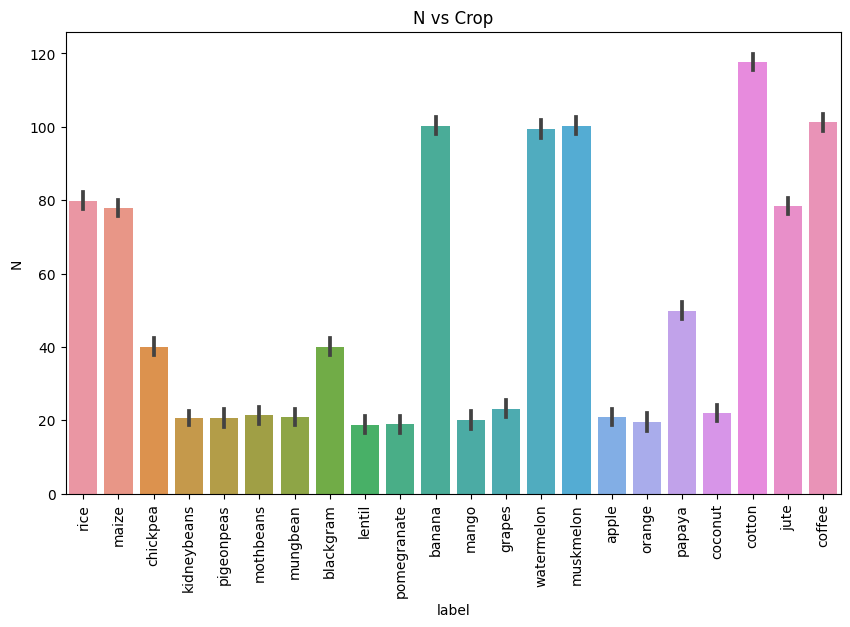

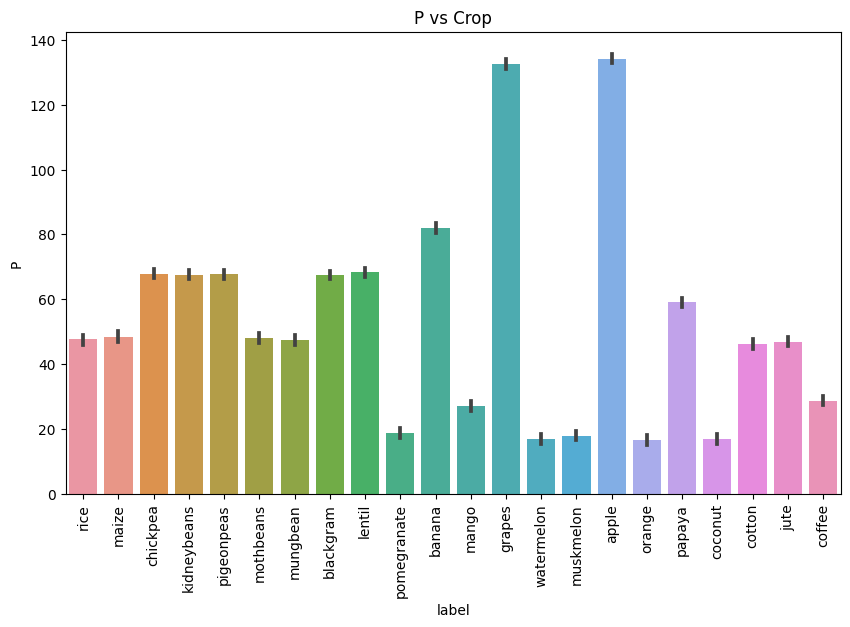

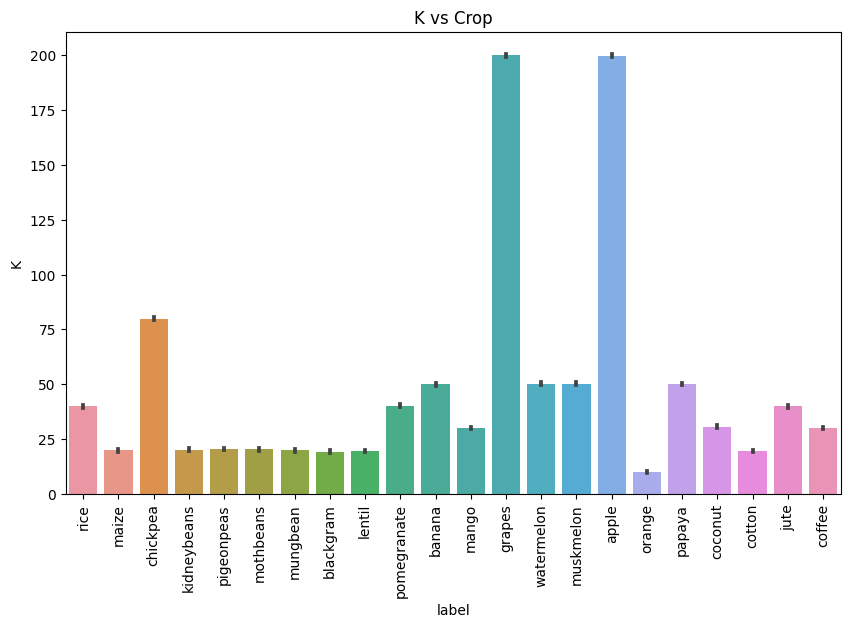

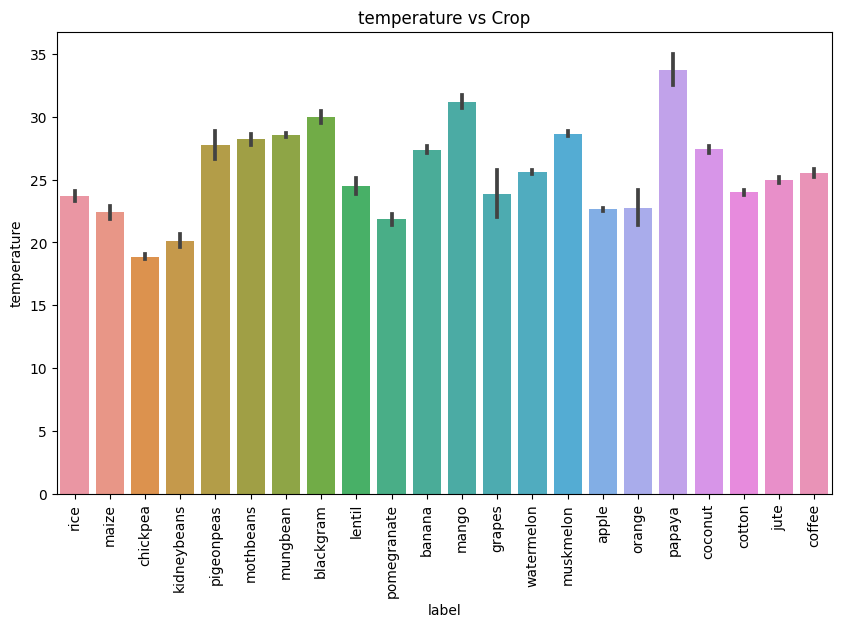

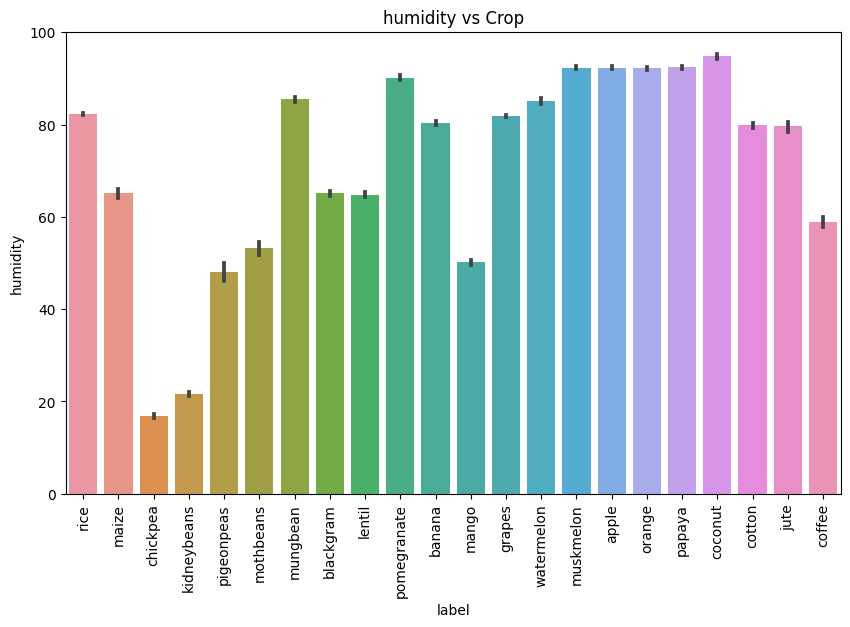

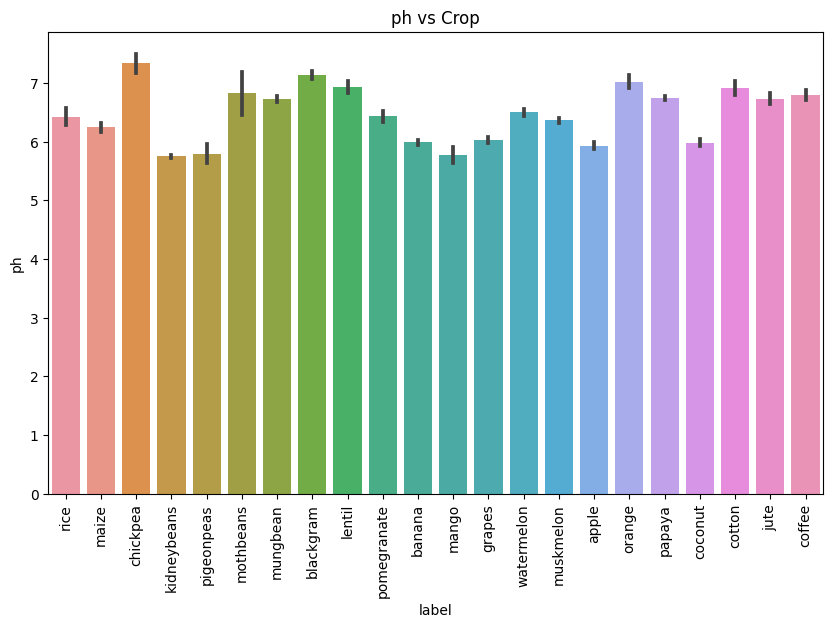

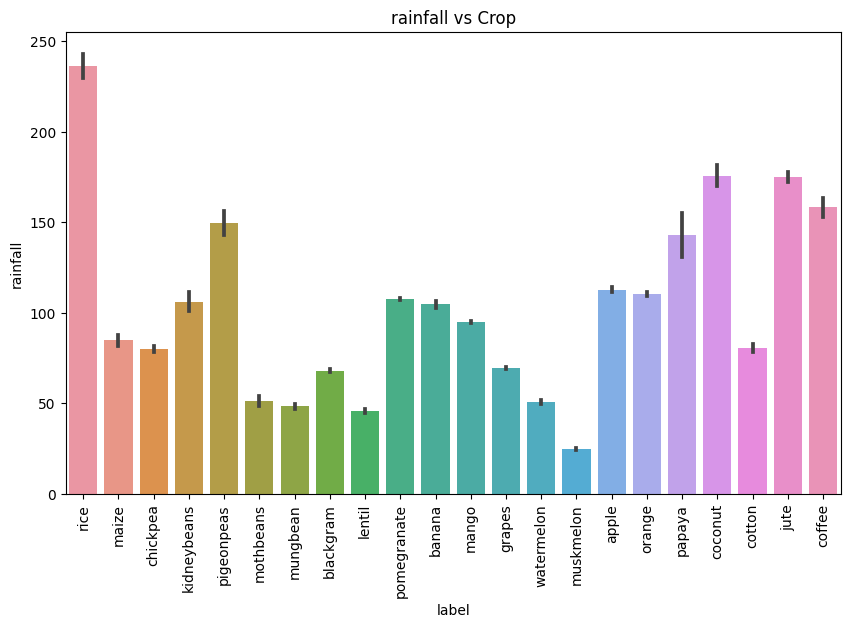

In [ ]:
for column in features:
  plt.figure(figsize=(10,6))
  sns.barplot(x='label',y=column,data=df)
  plt.xticks(rotation=90)
  plt.title(f'{column} vs Crop')

In [ ]:
plt.figure()
sns.pairplot(df,hue='label',palette='hls')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

***# Using Decision Tree ***

In [ ]:
x = df.drop('label', axis =1)
y = df['label']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dec_tree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2)

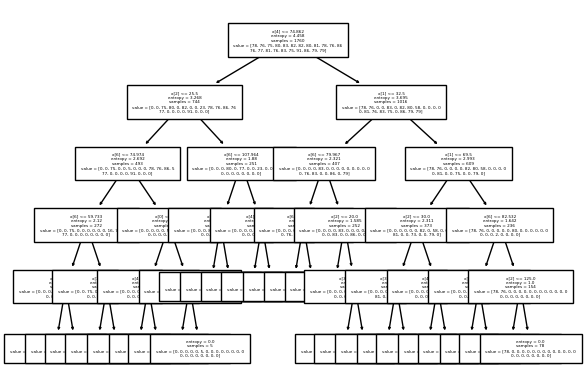

In [ ]:
tree.plot_tree(dec_tree,fontsize=3);


In [ ]:
from sklearn.metrics import accuracy_score,classification_report,f1_score,precision_score,confusion_matrix,recall_score
y_pred = dec_tree.predict(x_test)
s1 = f1_score(y_test,y_pred,average='macro')*100
print("F1 Score is: ", s1)
s2 = recall_score(y_test,y_pred,average='micro')*100
print("Recall Score is: ", s2)
s3 = precision_score(y_test,y_pred,average='macro')*100
print("Precision is: ", s3)
s4 = accuracy_score(y_test,y_pred)*100
print("Accuracy is: ", s4)
print("classification report is \n")
print(classification_report(y_test,y_pred))

F1 Score is:  91.83633950437459
Recall Score is:  92.72727272727272
Precision is:  94.7534910230835
Accuracy is:  92.72727272727272
classification report is 

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        22
      banana       1.00      1.00      1.00        24
   blackgram       0.75      0.96      0.84        25
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        17
      coffee       1.00      0.94      0.97        18
      cotton       1.00      1.00      1.00        18
      grapes       1.00      1.00      1.00        20
        jute       1.00      0.21      0.35        19
 kidneybeans       1.00      1.00      1.00        22
      lentil       0.83      1.00      0.91        24
       maize       0.87      0.93      0.90        14
       mango       1.00      0.92      0.96        24
   mothbeans       1.00      0.48      0.65        23
    mungbean       1.00      1

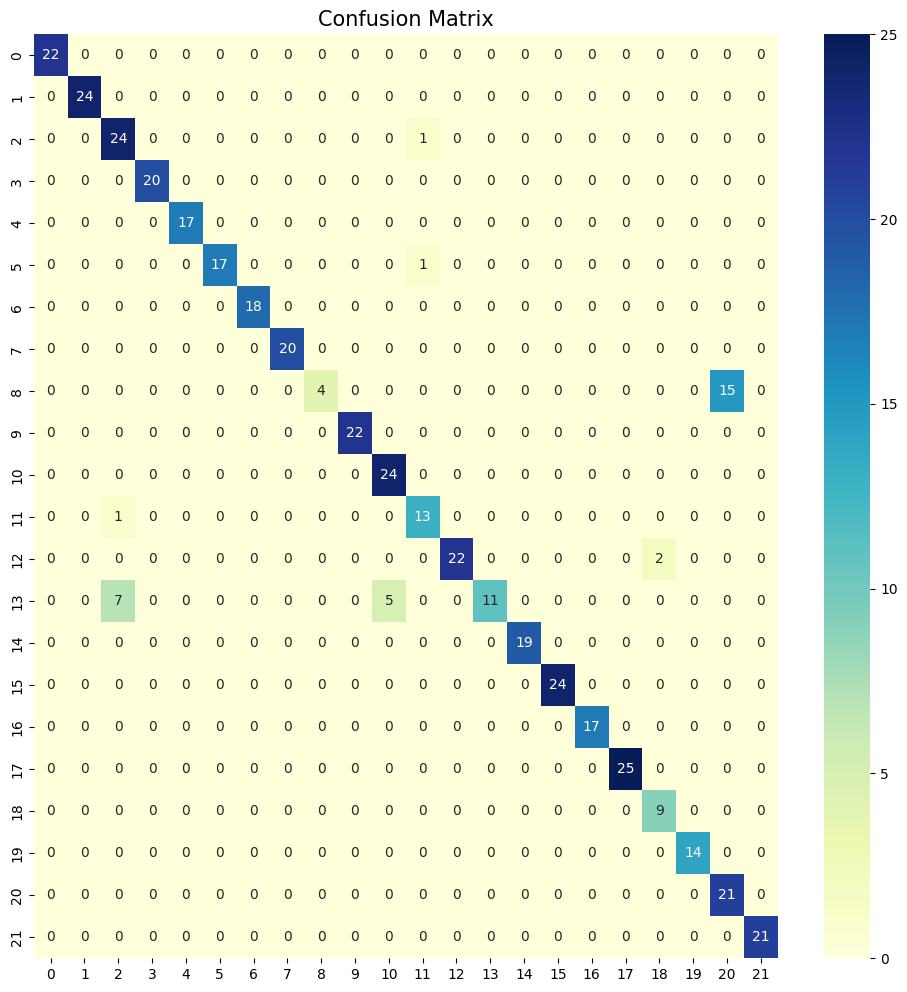

In [ ]:
plt.figure(figsize=(12,12))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu')
plt.title('Confusion Matrix', fontsize=15)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(dec_tree,x,y,cv=5)  # 5 folds
score


array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

# **Now by Using Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=5,criterion="entropy",random_state=0)    # default n_estimators=100
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=0)

In [ ]:
y_pred = rfc.predict(x_test)
s11 = f1_score(y_test,y_pred,average='macro')*100
print("F1 Score : ",s11)
s22 = recall_score(y_test,y_pred,average='macro')*100
print("Recall Score : ",s22)
s33 = precision_score(y_test,y_pred,average='macro')*100
print("Precision Score : ",s33)
s44 = accuracy_score(y_test,y_pred)*100
print("Accuracy Score : ",s44)
print(classification_report(y_test,y_pred))

F1 Score :  99.17733520357572
Recall Score :  99.13823590597045
Precision Score :  99.26891290527652
Accuracy Score :  99.0909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        22
      banana       1.00      1.00      1.00        24
   blackgram       1.00      1.00      1.00        25
    chickpea       1.00      0.95      0.97        20
     coconut       1.00      1.00      1.00        17
      coffee       1.00      1.00      1.00        18
      cotton       1.00      1.00      1.00        18
      grapes       1.00      1.00      1.00        20
        jute       1.00      0.95      0.97        19
 kidneybeans       1.00      1.00      1.00        22
      lentil       0.92      1.00      0.96        24
       maize       1.00      1.00      1.00        14
       mango       1.00      1.00      1.00        24
   mothbeans       1.00      0.91      0.95        23
    mungbean       1.00      1.00      1.00        19

**Compared to Decisiontreeclassifier , Randomforest Classifier gives more accuracy**

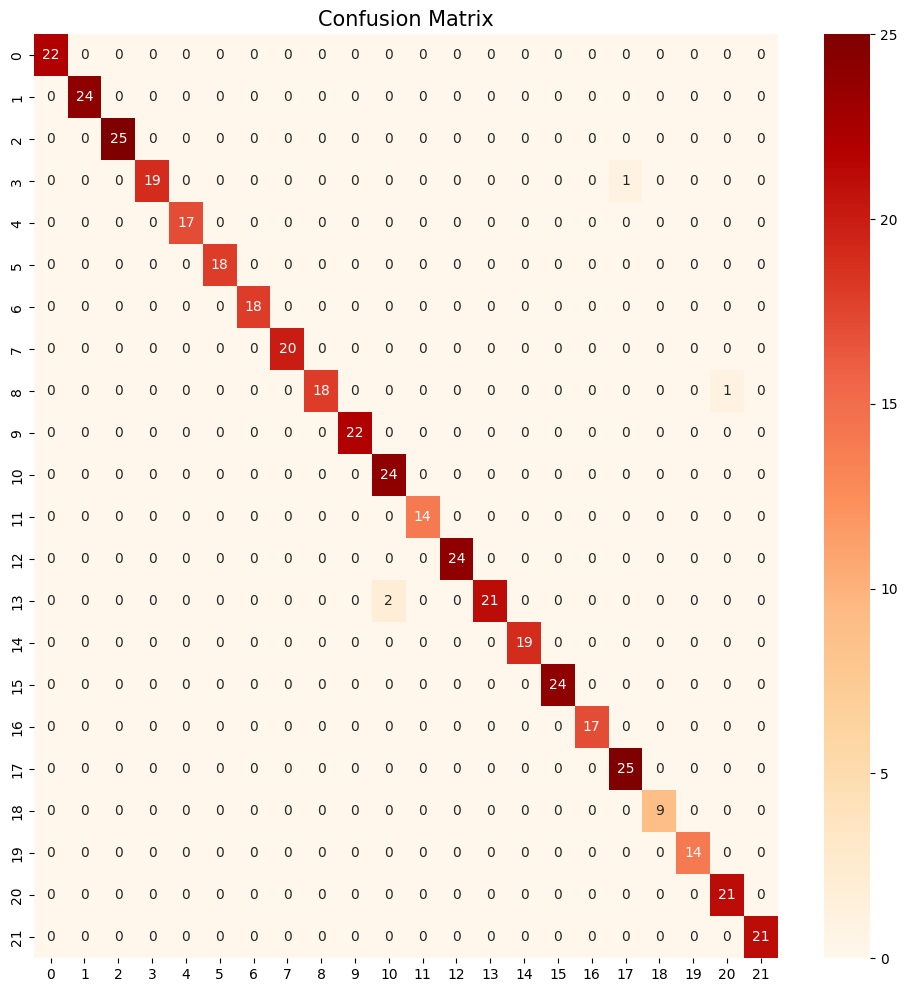

In [ ]:
plt.figure(figsize=(12,12))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'OrRd')
plt.title('Confusion Matrix', fontsize=15)
plt.show()

In [ ]:
score1 = cross_val_score(rfc,x,y,cv=5)
score1

array([0.99545455, 0.99318182, 0.99090909, 0.98636364, 0.97954545])

In [ ]:
# Try give some random data so that our model predicts the label or not .
# Let us  check

d = np.array([[90,42,43,20.87974,82.00274,6.50298,202.9355]])
pred = rfc.predict(d)
print(pred)

['rice']


In [ ]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
d1 = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
pred1 = rfc.predict(d1)
print(pred1)

['jute']


In [ ]:
d2 = np.array([[118,36,34,24.77782,60.15333,6.890043,140.88943]])
pred3 = rfc.predict(d2)
print(pred3)

['coffee']


***Now using KNN CLASSIFIER we will check the accuracy score.***



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,metric="euclidean")
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
y_pred = knn.predict(x_test)
s111 = f1_score(y_test,y_pred,average='macro')*100
print("F1 Score : ",s111)
s222 = recall_score(y_test,y_pred,average='macro')*100
print("Recall Score : ",s222)
s333 = precision_score(y_test,y_pred,average='macro')*100
print("Precision Score : ",s333)
s444 = accuracy_score(y_test,y_pred)*100
print("Accuracy Score : ",s444)
print(classification_report(y_test,y_pred))

F1 Score :  97.21373949028649
Recall Score :  97.15591267364722
Precision Score :  97.6563660318601
Accuracy Score :  97.27272727272728
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        22
      banana       1.00      1.00      1.00        24
   blackgram       1.00      1.00      1.00        25
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        17
      coffee       1.00      1.00      1.00        18
      cotton       1.00      1.00      1.00        18
      grapes       1.00      1.00      1.00        20
        jute       0.72      0.95      0.82        19
 kidneybeans       0.96      1.00      0.98        22
      lentil       0.92      0.96      0.94        24
       maize       1.00      1.00      1.00        14
       mango       1.00      1.00      1.00        24
   mothbeans       0.95      0.91      0.93        23
    mungbean       1.00      1.00      1.00        19

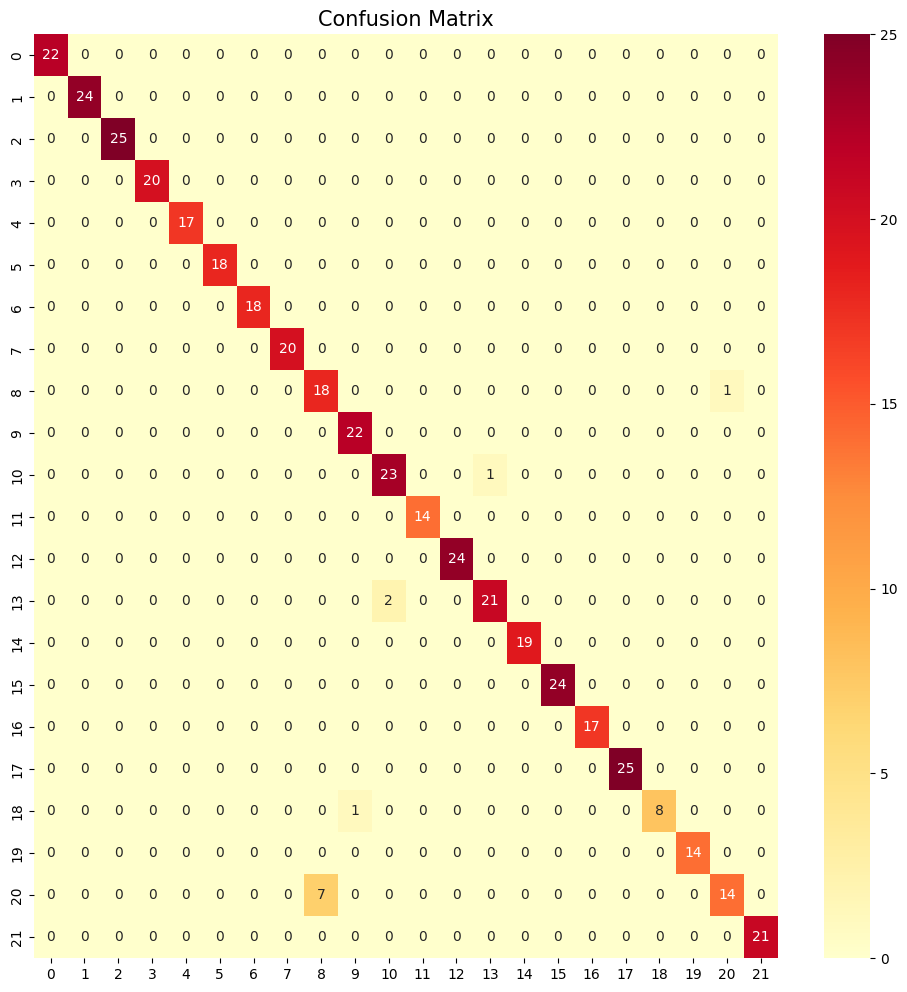

In [ ]:
plt.figure(figsize=(12,12))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'YlOrRd')
plt.title('Confusion Matrix', fontsize=15)
plt.show()

In [ ]:
# cross validate = 5

score3 = cross_val_score(knn,features,target,cv=5)
score3

array([0.97727273, 0.98181818, 0.97954545, 0.97954545, 0.97954545])

**Therefore , as per checking of three model RandomForest,KNN,Decison tree ,
Random Forest model gives more accuracy ...** 

In [ ]:
from sklearn.svm import SVC
sv = SVC(kernel='linear')
sv.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred = sv.predict(x_test)
s211 = f1_score(y_test,y_pred,average='macro')*100
print("F1 Score : ",s211)
s322 = recall_score(y_test,y_pred,average='macro')*100
print("Recall Score : ",s322)
s433 = precision_score(y_test,y_pred,average='macro')*100
print("Precision Score : ",s433)
s544 = accuracy_score(y_test,y_pred)*100
print("Accuracy Score : ",s544)
print("classification report is \n")
print(classification_report(y_test,y_pred))

F1 Score :  98.66950209451507
Recall Score :  98.68278651173388
Precision Score :  98.67424242424242
Accuracy Score :  98.63636363636363
classification report is 

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        22
      banana       1.00      1.00      1.00        24
   blackgram       1.00      1.00      1.00        25
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        17
      coffee       1.00      1.00      1.00        18
      cotton       1.00      1.00      1.00        18
      grapes       1.00      1.00      1.00        20
        jute       0.85      0.89      0.87        19
 kidneybeans       1.00      1.00      1.00        22
      lentil       1.00      0.96      0.98        24
       maize       1.00      1.00      1.00        14
       mango       1.00      1.00      1.00        24
   mothbeans       0.96      1.00      0.98        23
    mungbean       1.00  

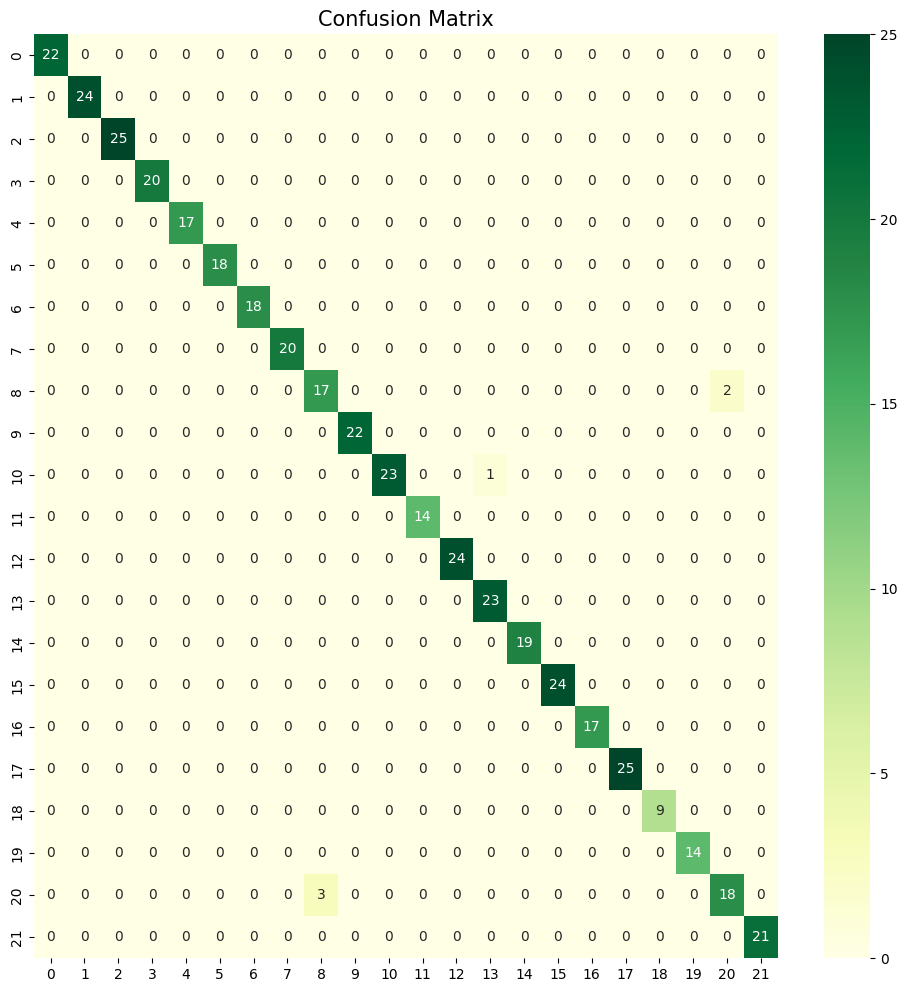

In [ ]:
plt.figure(figsize=(12,12))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'YlGn')
plt.title('Confusion Matrix', fontsize=15)
plt.show()

In [ ]:
d1 = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
pred1 =sv.predict(d1)
print(pred1)

['jute']


In [ ]:
# score  cross validation = 5

score4 = cross_val_score(sv,features,target,cv=5)
score4

array([0.98181818, 0.98863636, 0.98863636, 0.98181818, 0.98409091])

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(x_test)
s121 = f1_score(y_test,y_pred,average='macro')*100
print("F1 Score : ",s121)
s131 = recall_score(y_test,y_pred,average='macro')*100
print("Recall Score : ",s131)
s141 = precision_score(y_test,y_pred,average='macro')*100
print("Precision Score : ",s141)
s151 = accuracy_score(y_test,y_pred)*100
print("Accuracy Score : ",s151)
print("classification report is \n")
print(classification_report(y_test,y_pred))

F1 Score :  99.09090909090908
Recall Score :  99.11141490088859
Precision Score :  99.11141490088859
Accuracy Score :  99.0909090909091
classification report is 

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        22
      banana       1.00      1.00      1.00        24
   blackgram       1.00      1.00      1.00        25
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        17
      coffee       1.00      1.00      1.00        18
      cotton       1.00      1.00      1.00        18
      grapes       1.00      1.00      1.00        20
        jute       0.86      0.95      0.90        19
 kidneybeans       1.00      1.00      1.00        22
      lentil       1.00      1.00      1.00        24
       maize       1.00      1.00      1.00        14
       mango       1.00      1.00      1.00        24
   mothbeans       1.00      1.00      1.00        23
    mungbean       1.00   

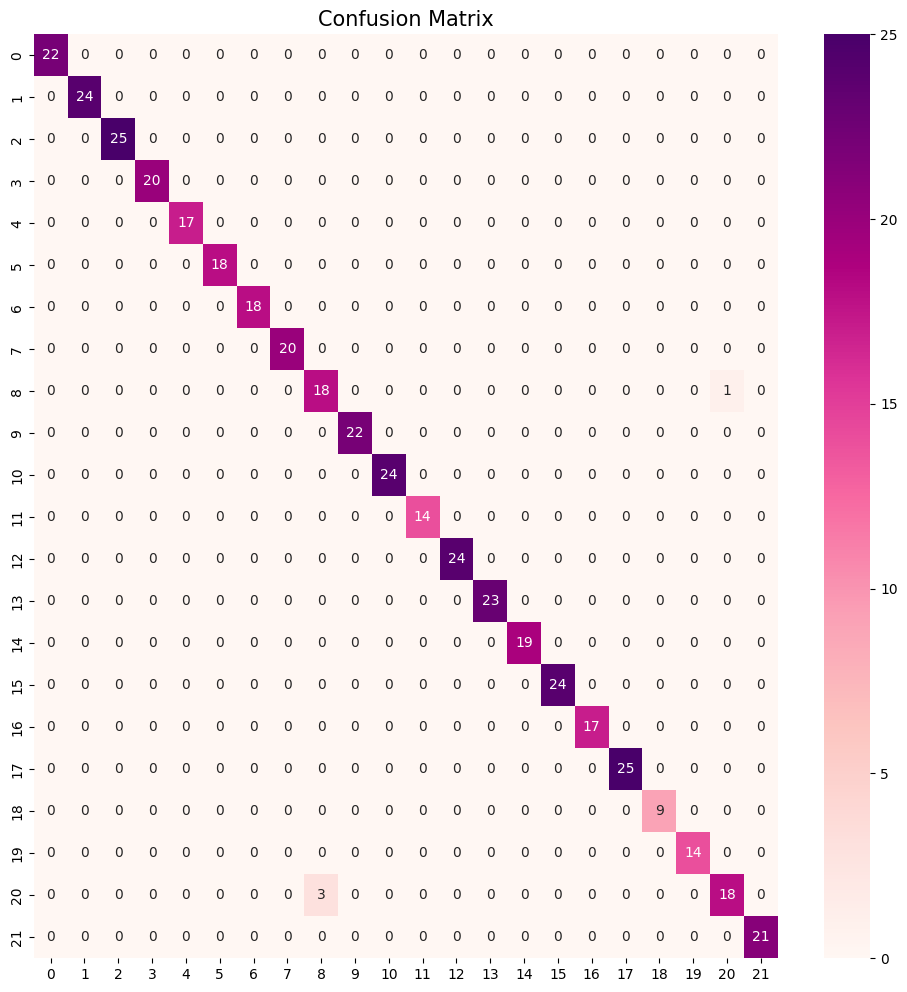

In [ ]:
plt.figure(figsize=(12,12))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'RdPu')
plt.title('Confusion Matrix', fontsize=15)
plt.show()

In [ ]:
d1 = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
pred1 =gnb.predict(d1)
print(pred1)

['jute']


In [ ]:
score5 = cross_val_score(gnb,features,target,cv=5)
score5

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

In [ ]:
l1=[s1,s2,s3,s4]
l2=[s11,s22,s33,s44]
l3=[s111,s222,s333,s444]
l4=[s211,s322,s433,s544]
l5=[s121,s131,s141,s151]
df=pd.DataFrame([l1,l2,l3,l4,l5],index=['DTC','RFC','KNN','SVM','NBC'],columns=['F1','Recall','Precision','Accuracy'])
print("Evaluation Metrics of Different Models")
df

Evaluation Metrics of Different Models


,F1,Recall,Precision,Accuracy
DTC,91.836340,92.727273,94.753491,92.727273
RFC,99.177335,99.138236,99.268913,99.090909
KNN,97.213739,97.155913,97.656366,97.272727
SVM,98.669502,98.682787,98.674242,98.636364
NBC,99.090909,99.111415,99.111415,99.090909
